In [205]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# sns.set(rc = {"figure.figsize": (11.7,8.27)})


In [206]:
df=pd.read_csv('US_players_joined_23_11_2022.csv')
df

,user,joined
0,8bnds,1649226488
1,aaruranhari1,1639226009
2,1ebony,1669225815
3,800831s,1669225544
4,abekacey,1669225454
...,...,...
9995,1rhodes,1193707031
9996,777boi,1193268759
9997,0ther,1193149366
9998,abetaha,1183916155


In [207]:
df1=df.loc[df['joined']>1600000000]
df1.to_csv('us_final.csv',index=False)

In [241]:
dp = lambda x: datetime.fromtimestamp(int(x))

path = [path for path in os.listdir("data/") if "us_final" in path]

us_join_dates = pd.read_csv("data/" + path[0], 
                            parse_dates = ["joined"], 
                            date_parser = dp)

us_join_dates.head()

,user,joined
0,aboveaverage2,2022-10-03 22:56:06
1,12381284981284912834u1289,2021-11-30 14:03:23
2,2ruffryders,2022-05-01 20:41:17
3,abasiubongudoeyop,2021-04-29 14:45:28
4,0hc0me0n,2022-06-22 22:13:02


In [242]:
us_join_dates.to_csv('us_join_dates.csv',index=False)

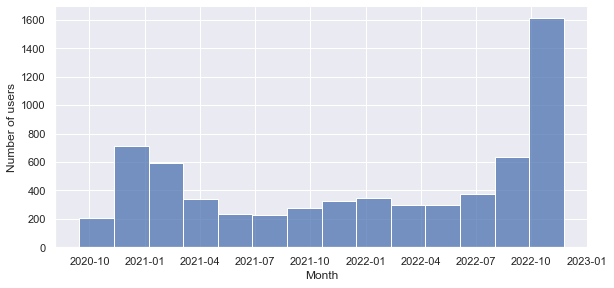

In [245]:
def filter1(join_dates, dt, months):
    
    earliest = dt - relativedelta(months = months)
    latest = dt + relativedelta(months = months)
    join_dates_event = join_dates[(join_dates["joined"] >= earliest) & 
                               (join_dates["joined"] <= latest)].copy()
    
    return join_dates_event

dt = datetime.strptime("2022-09-05", "%Y-%m-%d")

us_join_dates = filter1(us_join_dates, dt, 24)
delta_days = (dt + relativedelta(months =2)) - ((dt - relativedelta(months =2)))
delta_days = delta_days.days


fig = sns.displot(data = us_join_dates, 
                  x = "joined", 
                 
                  color = "b")

fig = fig.set(xlabel = "Month", ylabel = "Number of users")
fig.fig.set_figwidth(10)
fig.fig.set_figheight(4)

In [244]:
dt_event = datetime.strptime("2022-09-05", "%Y-%m-%d")
joined = filter1(us_join_dates, dt_event, 2)
print(dt_event.date())

2022-09-05


[Text(0.5, 0, 'Effect of the drama'), Text(0, 0.5, '% increase ')]

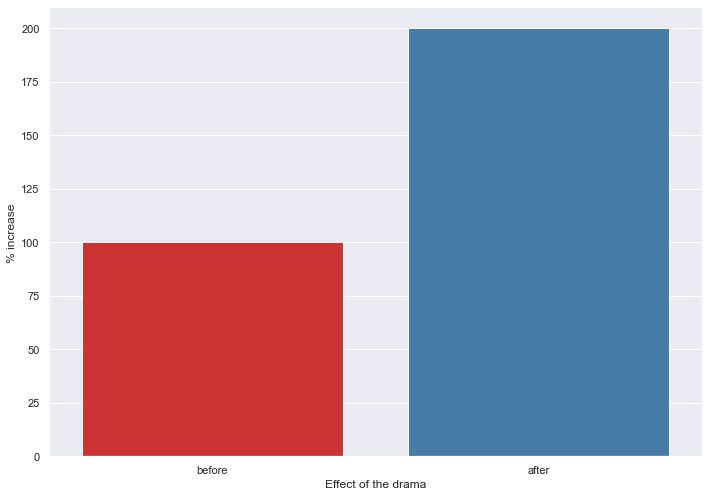

In [230]:

joined.loc[:, ("event")] = ["before" if date <= dt_event else "after" for date in joined["joined"]]
joined = joined.groupby("event").count().reset_index()
joined["percent"] = (joined["joined"]/joined["joined"].min()) * 100

fig = sns.barplot(data = joined,
                  x = "event", 
                  y = "percent", 
                  order = ["before", "after"],
                  palette = "Set1")

fig.set(xlabel = "Effect of the drama", 
        ylabel = "% increase ")

In [213]:
us_join_dates=us_join_dates.assign(date=0)
for i in range(len(us_join_dates)):
    us_join_dates.iloc[i,2]=us_join_dates.iloc[i,1].date()
us_join_dates

,user,joined,date
0,aboveaverage2,2022-10-03 22:56:06,2022-10-03
1,12381284981284912834u1289,2021-11-30 14:03:23,2021-11-30
2,2ruffryders,2022-05-01 20:41:17,2022-05-01
3,abasiubongudoeyop,2021-04-29 14:45:28,2021-04-29
4,0hc0me0n,2022-06-22 22:13:02,2022-06-22
...,...,...,...
6468,a-natural-born-winner,2022-04-02 18:05:48,2022-04-02
6469,144master,2022-04-29 12:13:49,2022-04-29
6470,10dog,2021-10-25 19:06:12,2021-10-25
6471,2tony3,2022-09-18 20:44:59,2022-09-18


In [214]:
df_users=pd.read_csv('n_users.csv')

<AxesSubplot:xlabel='date'>

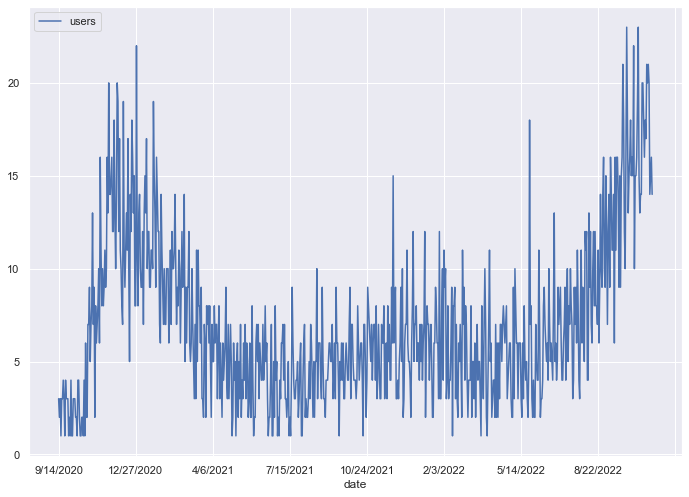

In [215]:
df_users.plot('date','users')

In [216]:
df_users=df_users.dropna()
df_users.date
temp_df=pd.Series(['11/1/2022','11/5/2022','11/10/2022','11/15/2022','11/20/2022','11/25/2022','11/30/2022','12/5/2022','12/10/2022','12/15/2022','12/20/2022','12/25/2022','12/30/2022'])
temp=df_users.date
temp=temp.append(temp_df)

C:\Users\amank\AppData\Local\Temp\ipykernel_19084\3642607102.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp=temp.append(temp_df)


In [217]:
from pmdarima.arima import auto_arima
arima_model=auto_arima(df_users.users, D=1)
arima_model = auto_arima(df_users.users,start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn',trace = True,stepwise = True, random_state=20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4532.246, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4201.831, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4381.782, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4128.085, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4090.985, Time=0.65 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4055.676, Time=1.29 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4032.837, Time=2.01 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=9.69 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=5.79 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=4189.869, Time=1.66 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=3960.326, Time=2.40 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=3979.137, Time=1.44 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=10.52 sec
 ARIMA(2,1,0)(4,1,1)[12]             :

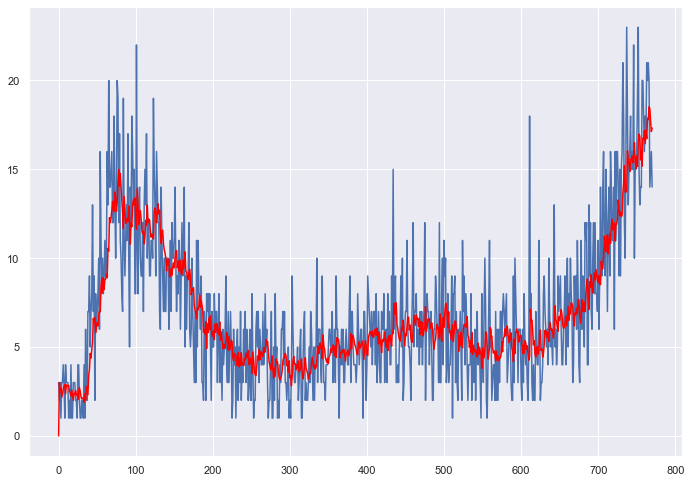

In [218]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_users.users.astype(float), order = (2, 1, 2))
ax=plt.gca()
results = model.fit()
plt.plot(df_users.users)
plt.plot(results.fittedvalues,color='red')

In [219]:
df_users.date
date=['7/15/2021','8/15/2021','9/15/2021','10/15/2021','11/15/2021','12/15/2021','1/15/2022','2/15/2022','3/15/2022','4/15/2022','5/15/2022','6/15/2022','7/15/2022','8/15/2022','9/15/2022','10/15/2022','11/15/2022','12/15/2022']

In [220]:
df1=df_users
df1['date']= pd.to_datetime(df1['date'])
temp=pd.to_datetime(temp)

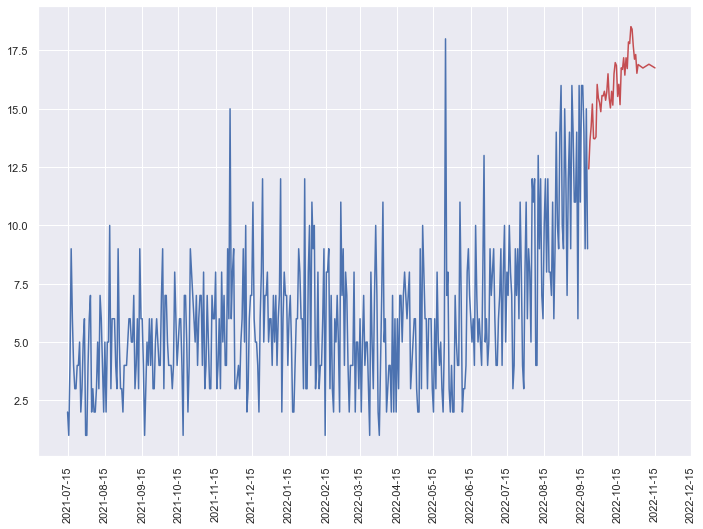

In [221]:
import datetime as dt
import matplotlib
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in date]

plt.plot(df1.date[300:730],df_users.users[300:730])
t = results.predict(start=(731), end=(775))
l=len(t)
plt.plot(temp[730:775],t,color='r')
plt.xticks(x, rotation=90)
plt.show()
